# Time Series Analysics
## 111-1 Homework #02


> WANG, YIFAN (R10A21126@ntu.edu.tw)  
> 2022-09-13


> * I use R in Jupyter Notebook
---

## 1.

 Take what you have simulated for the Q1 of HW#01 and add a proper disturbance to it, for example, $\epsilon_t \sim N (0, 0.1^2)$, to make it more fluctuating and, therefore, unpredictable. Now, let’s construct a mathematical
model to predict it.

a. Extend  the  time  series  to $y_{54}$ using  the  same  formula/procedures in  HW#01.  
b. Yefine a  proper disturbance for  your  time  series.  
c. Identify  the  number  of  periods  in  a  season and  then deseasonalize  the  series using $y_1, y_2,\dots, y_{48}$.  
d. Calculate  the  seasonality  factors  (depending  on  how  many  periods  in  a  season) using $y_1, y_2,\dots, y_{48}$.  
e. Finalize  the  model  and  validate the  model  performance  via  MSE  and  MAPE using $y_1, y_2,\dots, y_{48}$.  
f. Use  the  static  model  to  calculate $  \hat{y}_{49},\hat{y}_{50},\dots,\hat{y}_{54} $. Compare  with  the ground  truth  of  ${y}_{49},  y_{50},\dots,{y}_{54} $ and  calculate  the  prediction  MSE  and  MAPE  accordingly.  
g. Modify  the  disturbance  in  (a)  to  change  series  (can  be  more  or  less  fluctuating).  Re-run  the  procedures
(b)-(f).  What  can  you  conclude  when  comparing  to  the  results  in  (e) &  (f) with  the  previous  disturbance.

In [8]:
library(latex2exp)


## 1.a Without disturbance

$$Y_t = 20+t+10\sin\left[ \pi \left(\frac{1}{2}\cos\left(\frac{t}{2}\right)+1 \right)\right] \quad \text{for}\,\, t = 1,2,\dots,54$$


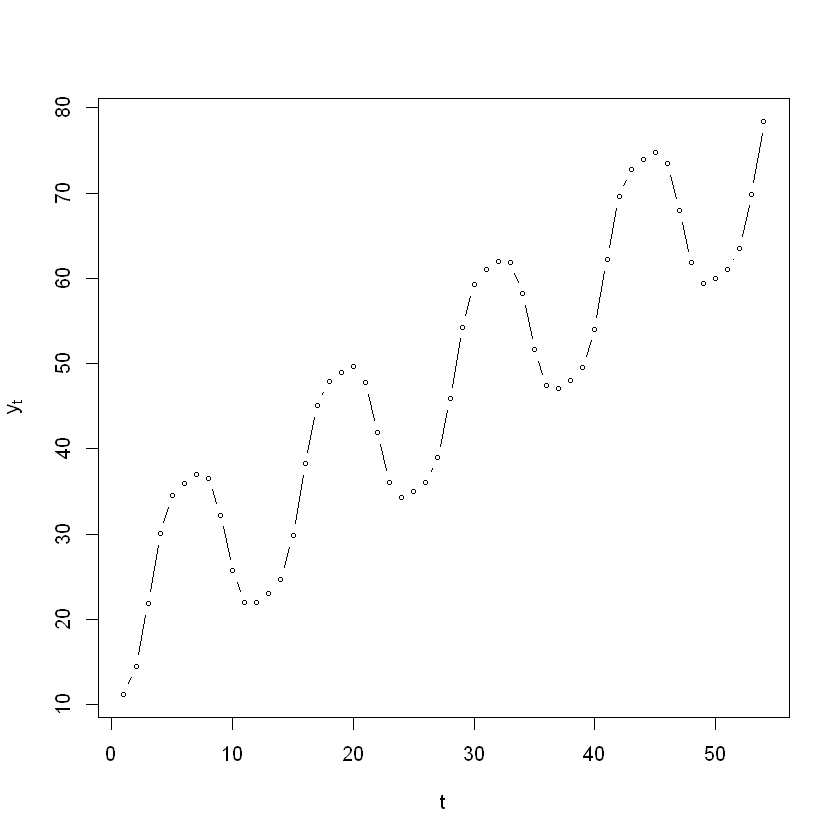

In [9]:
y_t_a = array(54)
set.seed(23)
for (t in 1:54){
    y_t_a[t] = 20+t + 10*sinpi(cos(t/2)/2+1) 
    }
plot(y_t_a,xlab = "t",ylab = TeX(r'($y_t$)'),type = 'b', cex = 0.5)
    

## 1.b With disturbance 

$$Y_t = 20+t+10\sin\left[ \pi \left(\frac{1}{2}\cos\left(\frac{t}{2}\right)+1 \right)\right]+ \epsilon_t \quad \text{for}\,\, t = 1,2,\dots,54,$$
where $\epsilon_t$ is generated from a normal distribution $N(\mu = 0,\sigma= 10)$.

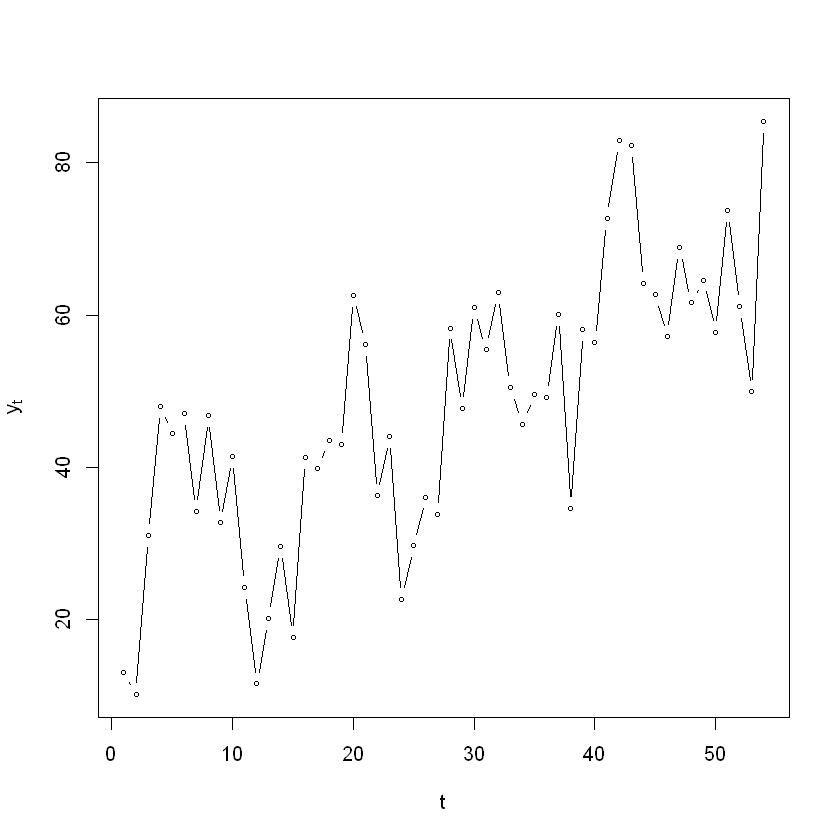

In [10]:
y_t = array(54)
set.seed(23)
for (t in 1:54){
    y_t[t] = 20+t + 10*sinpi(cos(t/2)/2+1) + rnorm(1,mean = 0,sd = 10)
    }
plot(y_t,xlab = "t",ylab = TeX(r'($y_t$)'),type = 'b', cex = 0.5)
    

In [11]:
y_t

[1] 13.11644 10.14893 31.02382 48.01502 44.48215 47.07367 34.16936 46.74822
 [9] 32.70537 41.44802 24.21182 11.55421 20.11988 29.55342 17.65639 41.34703
[17] 39.90692 43.47958 43.00677 62.62797 56.14811 36.27033 44.00097 22.64000
[25] 29.69186 36.09491 33.83136 58.29729 47.68495 60.96220 55.46222 62.95971
[33] 50.46044 45.68965 49.59978 49.16505 60.12156 34.57222 58.12078 56.34867
[41] 72.66910 82.87183 82.28769 64.14374 62.64395 57.13413 68.89404 61.59802
[49] 64.59358 57.70542 73.66997 61.11463 49.89982 85.44030

##  1.c
p = 12 (# of periods in a season)  
There are 12 periods in a season.  
Suppose we collect data every month, we have a 12-month season.
### De-seasonalize the series (using $y_1,y_2,\dots, y_{48}$)
$$
\bar{Y}_t = 
\begin{cases}

\frac{\left[Y_{t-(\frac{p}{2})}+Y_{t+(\frac{p}{2})}+\sum^{t-1+(\frac{p}{2})}_{i = t+1-(\frac{p}{2})}2Y_i\right]}{2p} & p \text{ is even}\\
\frac{\sum^{t+(\frac{p-1}{2})}_{i = t-(\frac{p-1}{2})}Y_i}{p} & p \text{ is odd}
\end{cases}
$$
In this case ($p = 12$), for $7\leq t\leq 42$, we have
$$\bar{Y}_t = \frac{\left[Y_{t-6}+Y_{t+6}+\sum^{t-1+6}_{i = t+1-6}2Y_i\right]}{2*12}$$


For $7\leq t\leq 42$, we run regression with $t$ and $\bar{Y}_t$ and get the coefficients   
L = 	22.03068693  
T = 	0.915279317


Then we have deseasonalized $ \hat{\bar{Y}}_t $ with $ \hat{\bar{Y}}_t = L+tT $ for $1\leq t\leq 48$

## 1.d

For $1\leq t\leq 48$

$$S_t =  \frac{\bar{Y}_t}{\hat{\bar{Y}}_t}
$$

Then we get the average of the seasonality effect for each period in a season as $\bar{S}_t$.   For example, $\bar{S}_1 = \frac{1}{4}(S_1+S_{13}+S_{25}+S_{37})$. The values of  $\bar{S}_t$ are the same for each season. They are also the same for the testing data.

## 1.e

For $1\leq t\leq 48$

$$\hat{Y}_t =\hat{\bar{Y}}_t * \bar{S}_t $$
$$E_t = Y_t-\hat{Y}_t$$

We now caculate MSE and MAPE for $y_1,y_2,\dots, y_{48}$

MSE = 82.18	  
MAPE	 = 	20.30%	
			
		


## 1.f

For $49\leq t\leq 54$

$$ \hat{\bar{Y}}_t = L+tT $$
$$\hat{Y}_t =\hat{\bar{Y}}_t * \bar{S}_t $$
$$E_t = Y_t-\hat{Y}_t$$

We now caculate MSE and MAPE for $y_{49},y_{50},\dots, y_{54}$

MSE = 495.07	  
MAPE	 = 	33.53%	
			
		


### Conclusion
|	|MSE	|MAPE
|  ----  | ----  |----  |
Training |	82.18	 |20.30%	
Testing	| 495.07	|	33.53%	

# 1.g Modify  the  disturbance

$$Y_t = 20+t+10\sin\left[ \pi \left(\frac{1}{2}\cos\left(\frac{t}{2}\right)+1 \right)\right]+ \epsilon_t \quad \text{for}\,\, t = 1,2,\dots,54,$$
where $\epsilon_t$ is generated from a normal distribution $N(\mu = 0,\sigma= 5)$.

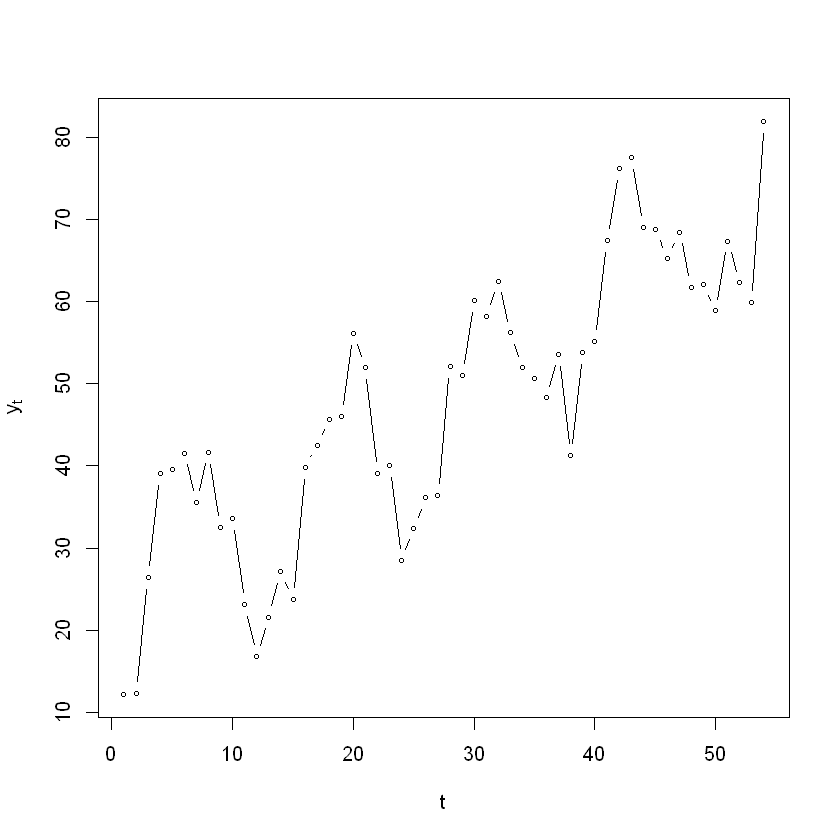

In [12]:
y_t2 = array(54)
set.seed(23)
for (t in 1:54){
    y_t2[t] = 20 + t + 10*sinpi(cos(t/2)/2+1) + rnorm(1,mean = 0,sd = 5)
    }
plot(y_t2,xlab = "t",ylab = TeX(r'($y_t$)'),type = 'b', cex = 0.5)
    

In [13]:
y_t2

[1] 12.15038 12.32234 26.45748 39.04807 39.49913 41.53622 35.55980 41.65219
 [9] 32.47818 33.56913 23.12038 16.78689 21.56332 27.14567 23.73827 39.80635
[17] 42.50781 45.69115 46.00334 56.15508 51.97115 39.10041 40.05888 28.46964
[25] 32.34596 36.10020 36.39417 52.08295 50.98787 60.12908 58.22825 62.46880
[33] 56.19377 51.93929 50.61034 48.27755 53.58332 41.28690 53.81537 55.18429
[41] 67.45782 76.22634 77.55790 69.07187 68.72329 65.28016 68.43246 61.70861
[49] 62.02620 58.85319 67.36239 62.30680 59.88889 81.93492

Repeat the steps above

|  |MSE	|MAPE|
|  ----  | ----  |----  |
|Training |	46.33	|13.33%|
|Testing	| 270.95|	23.63%|



### In general, the model performs better for data with smaller fluctuation.

## 2. 

Construct the Holt-Winter’s model (Triple Exponential Smoothing model) for the same data in 1-(a)
using $y_1, y_2,\dots, y_{48}$.  Try  to  find  the  smoothing  factors  with  better performance.  Explain  what  you  observe 
comparing with the results in 1-(e) & 1-(f)

We use the $L_t$ first model in EXCEL  
$L_0,T_0$ are from the regression model

## SMOOTHING FACTORS WITH BETTER PERFORMANCE


|Smoothing constant|Value|
|---:|---|
|$\alpha$|	0.09|
|$\beta$	|0.79|
|$\gamma$|	0.84|


|`	|MSE|	MAPE|
|----:|:----:|:----|
|Training	|346.69	|28.92%|
|Testing	|221.47	|20.46%|


The validation data has greater fluctuation (worse MSE and MAPE) while the model performs better for testing data.